# II. Iris

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
train_data=pd.read_csv('Iris.csv')
train_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [ ]:
train_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
train_data.isnull().sum() # Kiểm tra giá tri thiếu
train_data = train_data.dropna()  # Loại bỏ dòng thiếu
# Hoặc thay thế giá trị thiếu
train_data.fillna(train_data.mean(), inplace=True)

## Mã hóa dữ liệu

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data['Species'] = encoder.fit_transform(train_data['Species'])
train_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


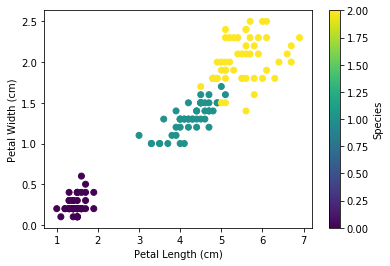

In [ ]:
plt.scatter(train_data['PetalLengthCm'], train_data['PetalWidthCm'], c=train_data['Species'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.colorbar(label='Species')
plt.show()

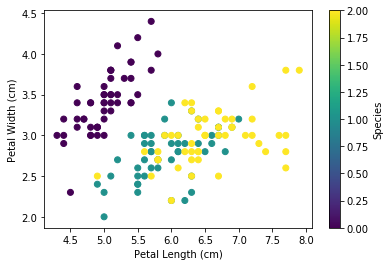

In [ ]:
plt.scatter(train_data['SepalLengthCm'], train_data['SepalWidthCm'], c=train_data['Species'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.colorbar(label='Species')
plt.show()

## Chọn đặc trưng mới

In [ ]:
train_data['SepalArea'] = train_data['SepalLengthCm'] * train_data['SepalWidthCm']
train_data['PetalArea'] = train_data['PetalLengthCm'] * train_data['PetalWidthCm']
train_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalArea,PetalArea
0,1,5.1,3.5,1.4,0.2,0,17.85,0.28
1,2,4.9,3.0,1.4,0.2,0,14.70,0.28
2,3,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5,5.0,3.6,1.4,0.2,0,18.00,0.28


## Chọn đặc trưng phù hợp

In [ ]:
X = train_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','PetalArea']]
y = train_data['Species']
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,PetalArea
0,5.1,3.5,1.4,0.2,0.28
1,4.9,3.0,1.4,0.2,0.28
2,4.7,3.2,1.3,0.2,0.26
3,4.6,3.1,1.5,0.2,0.30
4,5.0,3.6,1.4,0.2,0.28
5,5.4,3.9,1.7,0.4,0.68
6,4.6,3.4,1.4,0.3,0.42
7,5.0,3.4,1.5,0.2,0.30
8,4.4,2.9,1.4,0.2,0.28
9,4.9,3.1,1.5,0.1,0.15


## Chuẩn hóa dữ liệu

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# chuẩn hóa dữ liệu về thang đo có trung bình =0 và độ lệch chuẩn bằng 1 theo công thức: X_scale=(X-mean)/std
print(features_scaled)
print(X_scaled)

[[-1.72054204 -0.90068117  1.03205722 ... -1.31297673 -1.22474487
  -1.17356615]
 [-1.69744751 -1.14301691 -0.1249576  ... -1.31297673 -1.22474487
  -1.17356615]
 [-1.67435299 -1.38535265  0.33784833 ... -1.31297673 -1.22474487
  -1.17782349]
 ...
 [ 1.67435299  0.79566902 -0.1249576  ...  1.05353673  1.22474487
   0.98065155]
 [ 1.69744751  0.4321654   0.80065426 ...  1.44795564  1.22474487
   1.41064362]
 [ 1.72054204  0.06866179 -0.1249576  ...  0.79059079  1.22474487
   0.72095337]]
[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00
  -1.17356615e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00
  -1.17356615e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00
  -1.17782349e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00
  -1.16930880e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00
  -1.17356615e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00
  -1.08841920e+00

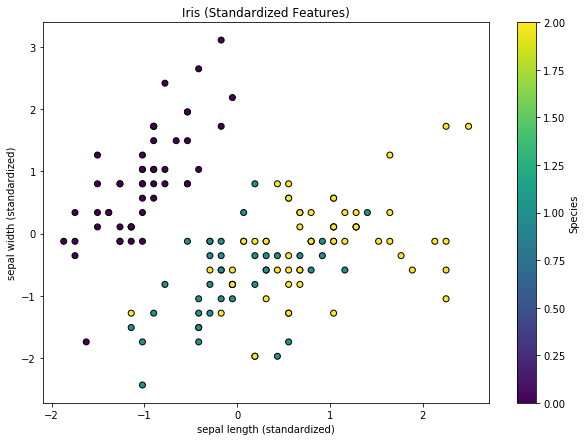

In [ ]:
# Giả sử X_scaled là dữ liệu đã chuẩn hóa, y là nhãn species
plt.figure(figsize=(10,7))
scatter = plt.scatter(
    X_scaled[:, 0],  # sepal length (chuẩn hóa)
    X_scaled[:, 1],  # sepal width (chuẩn hóa)
    c=y, cmap='viridis', edgecolor='k'
)
plt.xlabel('sepal length (standardized)')
plt.ylabel('sepal width (standardized)')
plt.title('Iris (Standardized Features)')
plt.colorbar(scatter, label='Species')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.5, random_state=0
)# test_size=0.2 lấy 20% dữ liệu sẽ dùng để kiểm tra còn 80% để huấn luyện

## Huấn luyện Logistic Regression

In [ ]:
model = LogisticRegression(solver="lbfgs",multi_class='auto')
a=model.fit(X_train, y_train)
y_pred = model.predict(X_test)
a

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Đánh giá mô hình

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9466666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      1.00      0.94        30
           2       1.00      0.83      0.91        24

   micro avg       0.95      0.95      0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



In [ ]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average="weighted"))
print("Recall   :", recall_score(y_test, y_pred,average="weighted"))
print("F1 Score :", f1_score(y_test, y_pred,average="weighted"))

Accuracy : 0.9238095238095239
Precision: 0.9383219954648525
Recall   : 0.9238095238095239
F1 Score : 0.9233377561550936


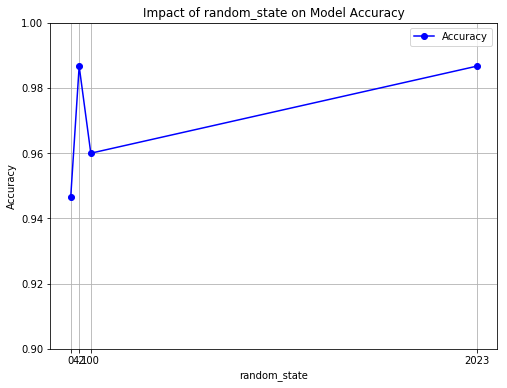

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dữ liệu đã chuẩn bị sẵn: X_scaled, y
random_states = [0, 42, 100, 2023]  # Các giá trị random_state để thử nghiệm
accuracies = []

for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=state)
    model = LogisticRegression(solver="lbfgs", multi_class="auto")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(random_states, accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.title('Impact of random_state on Model Accuracy')
plt.xlabel('random_state')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Giới hạn trục y
plt.xticks(random_states)
plt.grid(True)
plt.legend()
plt.show()
